# We're Going to Vegas!

<img src="welcome_vegas.jpg">

Let's first introduce the data we're going to work with.

We'll use a dataset that relates to hotels in Las Vegas.  This data was obtained from reviews on Trip Adviser in 2015.  It was used in a paper, 

- Moro, S., Rita, P., & Coelho, J. (2017). Stripping customers' feedback on hotels through data mining: The case of Las Vegas Strip. Tourism Management Perspectives, 23, 41-52.

I downloaded the data from the UC Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php), which is a great source for interesting datasets.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Vegas = pd.read_csv('vegas.csv')

In [3]:
Vegas.shape

(504, 20)

In [4]:
Vegas.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [6]:
Vegas.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

## Fixing Column Names

Before we start, it will be nice not to have spaces in the column names.  If there are spaces, we won't be able to access variables using attribute notation.

This is probably easiest to do with a regular expression.  We want to match whitespace, but we also want to get rid of any periods that come before a space.  Remember that `.` matches any character except newline, but if you include the escape character, `\.` looks for an actual period.  The `*` means we want zero or more periods.  `\s` matches whitespace characters and the `+` means we're looking for one or more.

Let's also go all lowercase while we're at it.

In [6]:
Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()
Vegas.head()

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


Now we can access columns as attributes.

In [7]:
Vegas.period_of_stay.value_counts()

Mar-May    128
Sep-Nov    126
Jun-Aug    126
Dec-Feb    124
Name: period_of_stay, dtype: int64

## Series.groupby

Let's jump into some simple uses of `groupby`.  Suppose we want the mean score for each hotel.  There are several ways to do this.  One is to pull out the `score` and call `groupby` on it with `hotel_name`.

In [11]:
score_by_hotel = Vegas.score.groupby(Vegas.hotel_name)
score_by_hotel.head()

0      5
1      3
2      5
3      4
4      4
      ..
480    4
481    3
482    4
483    3
484    5
Name: score, Length: 105, dtype: int64

Notice that in this example we called `groupby` on a `Series`, passing in a `Series` argument.  That's a very common pattern.

`by_hotel` is now a `GroupBy` object.  We haven't really computed anything at this point.  But in the background, Python has done some preprocessing so that it's ready to perform operations on each hotel.  You can conceptually imagine that it has grouped the data each hotel together.

Unfortunately, the printout for a `groupby` object doesn't tell you very much about what's inside.  It may help you to take a look as an example group, to make sure that it has the form you're expecting.  You can do this with the `get_group` method.

In [10]:
score_by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')

0     5
1     3
2     5
3     4
4     4
5     3
6     4
7     4
8     4
9     3
10    2
11    3
12    2
13    3
14    3
15    4
16    1
17    4
18    3
19    2
20    4
21    1
22    4
23    2
Name: score, dtype: int64

In [12]:
score_by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas').mean()

3.2083333333333335

In [21]:
score_by_hotel.mean().sort_values(ascending=False)

hotel_name
Wynn Las Vegas                                        4.62
The Venetian Las Vegas Hotel                          4.58
Encore at wynn Las Vegas                              4.54
Marriott's Grand Chateau                              4.54
Trump International Hotel Las Vegas                   4.38
Wyndham Grand Desert                                  4.38
The Palazzo Resort Hotel Casino                       4.38
The Cosmopolitan Las Vegas                            4.25
Tuscany Las Vegas Suites & Casino                     4.21
Bellagio Las Vegas                                    4.21
Hilton Grand Vacations on the Boulevard               4.17
Caesars Palace                                        4.12
The Cromwell                                          4.08
Paris Las Vegas                                       4.04
Tropicana Las Vegas - A Double Tree by Hilton Hotel   4.04
Treasure Island- TI Hotel & Casino                    3.96
Hilton Grand Vacations at the Flamingo       

We get back a `Series` that contains just the scores for Circus Circus.  In fact, I  generally recommend that you do exactly this - pull out a single group to experiment with - before attempting complex group operations.

Now that we've grouped by hotel, we can take the mean for each group with the `mean()` method.

In [22]:
score_by_hotel.mean().sort_values()

hotel_name
Circus Circus Hotel & Casino Las Vegas                3.21
Monte Carlo Resort&Casino                             3.29
Excalibur Hotel & Casino                              3.71
The Westin las Vegas Hotel Casino & Spa               3.92
Hilton Grand Vacations at the Flamingo                3.96
Treasure Island- TI Hotel & Casino                    3.96
Tropicana Las Vegas - A Double Tree by Hilton Hotel   4.04
Paris Las Vegas                                       4.04
The Cromwell                                          4.08
Caesars Palace                                        4.12
Hilton Grand Vacations on the Boulevard               4.17
Bellagio Las Vegas                                    4.21
Tuscany Las Vegas Suites & Casino                     4.21
The Cosmopolitan Las Vegas                            4.25
The Palazzo Resort Hotel Casino                       4.38
Wyndham Grand Desert                                  4.38
Trump International Hotel Las Vegas          

We get back a `Series`.  Notice that the index is made up of the unique values in the group key, `hotel_name`.  The index has the name `hotel_name` because that's the name of `Series` we passed in.

Similarly, we can find the miminum rating for each hotel.

In [23]:
score_by_hotel.min()

hotel_name
Bellagio Las Vegas                                     2
Caesars Palace                                         1
Circus Circus Hotel & Casino Las Vegas                 1
Encore at wynn Las Vegas                               1
Excalibur Hotel & Casino                               2
Hilton Grand Vacations at the Flamingo                 2
Hilton Grand Vacations on the Boulevard                1
Marriott's Grand Chateau                               3
Monte Carlo Resort&Casino                              1
Paris Las Vegas                                        2
The Cosmopolitan Las Vegas                             1
The Cromwell                                           1
The Palazzo Resort Hotel Casino                        3
The Venetian Las Vegas Hotel                           3
The Westin las Vegas Hotel Casino & Spa                2
Treasure Island- TI Hotel & Casino                     3
Tropicana Las Vegas - A Double Tree by Hilton Hotel    1
Trump International 

Another very useful method is `size()`, which tells you how many rows are in each group.

In [24]:
score_by_hotel.size()

hotel_name
Bellagio Las Vegas                                     24
Caesars Palace                                         24
Circus Circus Hotel & Casino Las Vegas                 24
Encore at wynn Las Vegas                               24
Excalibur Hotel & Casino                               24
Hilton Grand Vacations at the Flamingo                 24
Hilton Grand Vacations on the Boulevard                24
Marriott's Grand Chateau                               24
Monte Carlo Resort&Casino                              24
Paris Las Vegas                                        24
The Cosmopolitan Las Vegas                             24
The Cromwell                                           24
The Palazzo Resort Hotel Casino                        24
The Venetian Las Vegas Hotel                           24
The Westin las Vegas Hotel Casino & Spa                24
Treasure Island- TI Hotel & Casino                     24
Tropicana Las Vegas - A Double Tree by Hilton Hotel    24
Tru

You can see that we have the same number of reviews for each hotel, which reflects the methodology by which the data was gathered.

We can also groupby multiple columns.  For example

In [25]:
by_trav_pool = Vegas.score.groupby([Vegas.traveler_type, Vegas.pool]).mean()
by_trav_pool

traveler_type  pool
Business       NO     3.00
               YES    3.89
Couples        NO     2.71
               YES    4.29
Families       NO     3.38
               YES    4.07
Friends        NO     3.43
               YES    4.33
Solo           NO     4.00
               YES    3.91
Name: score, dtype: float64

We get back a `Series` with a multi-index.  Each group key becomes a level of the index.  If we want to plot this information, we probably need to unstack the index first.

In [26]:
by_trav_pool.unstack()

pool,NO,YES
traveler_type,,
Business,3.00,3.89
Couples,2.71,4.29
Families,3.38,4.07
Friends,3.43,4.33
Solo,4.00,3.91


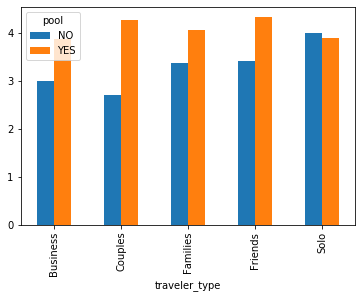

In [27]:
by_trav_pool.unstack().plot(kind='bar')

So far, we've taken the `Series` we're grouping and the group key from the same `DataFrame`, but you should recognize that this isn't necessary.  `groupby` works as long as the two `Series` we're using have the same length.  Here's a quick demo to show this.

In [16]:
grades = pd.Series([90, 85, 70,66])
studied = pd.Series([True, True, False, False])
grades.groupby(studied).mean()

False   68.00
True    87.50
dtype: float64

This should help you understand how `groupby` works, but it's not a great way to code.  In this case, it's hard to know whether the two `Series` objects are in the same correct order.